Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [46]:
import pandas as pd
import requests
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap as bm

In [47]:
bikes = pd.read_csv("CDMX_bikes.csv")
POIs = pd.read_csv("POIs_5_locs.csv")

In [48]:
five_locs = pd.merge(bikes, POIs, left_on="ll", right_on="bike_ll")

In [49]:
five_locs

,uid,latitude_x,longitude_x,empty_slots,free_bikes,ll,POI_name,latitude_y,longitude_y,distance,category_name,category_id,prices,bike_ll
0,110,19.432819,-99.151734,4,19,"19.432819,-99.151734",La Cima,19.432791,-99.151747,3,Bar,13003,2.0,"19.432819,-99.151734"
1,110,19.432819,-99.151734,4,19,"19.432819,-99.151734",Viento en Popa,19.432556,-99.151432,43,Seafood Restaurant,13338,3.0,"19.432819,-99.151734"
2,110,19.432819,-99.151734,4,19,"19.432819,-99.151734",El Mana,19.432653,-99.152212,48,Mexican Restaurant,13303,1.0,"19.432819,-99.151734"
3,110,19.432819,-99.151734,4,19,"19.432819,-99.151734",El tequio,19.433077,-99.152199,56,Mexican Restaurant,13303,1.0,"19.432819,-99.151734"
4,110,19.432819,-99.151734,4,19,"19.432819,-99.151734",Cantina el Dragón de Oro,19.432772,-99.152359,65,Restaurant,13065,2.0,"19.432819,-99.151734"
5,110,19.432819,-99.151734,4,19,"19.432819,-99.151734","Tequio ""Sazón Chilango""",19.433237,-99.152187,66,Taco Restaurant,13306,1.0,"19.432819,-99.151734"
6,110,19.432819,-99.151734,4,19,"19.432819,-99.151734",Los Tacos del Seven,19.433188,-99.152015,66,Taco Restaurant,13306,1.0,"19.432819,-99.151734"
7,110,19.432819,-99.151734,4,19,"19.432819,-99.151734",Cantina el Dragón de Oro,19.432631,-99.152336,66,Bistro,13027,NaN,"19.432819,-99.151734"
8,110,19.432819,-99.151734,4,19,"19.432819,-99.151734",Cafeteria de Cuba,19.432507,-99.151154,69,Restaurant,13065,NaN,"19.432819,-99.151734"
9,110,19.432819,-99.151734,4,19,"19.432819,-99.151734",El Buen Amigo,19.432507,-99.151154,74,Burger Joint,13031,1.0,"19.432819,-99.151734"


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

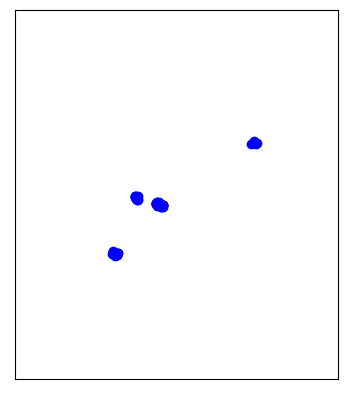

In [50]:
#plt.figure(figsize=(8, 8))
#cdmx_map.scatter(longitude-99.151747, latitude19.432791 latlon=True, color='blue', zorder=5)

latitude_x = five_locs.latitude_x.values
longitude_x = five_locs.longitude_x.values
latitude_y = five_locs.latitude_y.values
longitude_y = five_locs.longitude_y.values

cdmx_map = bm(llcrnrlon= -99.13, llcrnrlat =19.46, urcrnrlon= -99.2, urcrnrlat= 19.38, projection="cyl") 
cdmx_map.drawcoastlines = False
cdmx_map.drawmapboundary = False
cdmx_map.fillcontinents = False

cdmx_map.scatter(longitude_x, latitude_x, latlon=True, color='red', zorder=5)
cdmx_map.scatter(longitude_y, latitude_y, latlon=True, color='blue', zorder=5)

plt.show()


In [52]:
import plotly.express as px

five_locs['size'] = 20

fig = px.scatter_mapbox(five_locs, lat="latitude_x", lon="longitude_x", size='size',
                  color_continuous_scale=px.colors.sequential.Plasma,
                  zoom=14)
fig.show()


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Look at the data before and after the join to validate your data.